# 第2章 感知机

## 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

**解答思路：**  
1. 列出异或函数(XOR)的输入和输出；
2. 使用图例法证明异或问题是线性不可分的；
3. 使用反证法证明感知机无法表示异或。

**解题步骤：**

**第1步：异或函数(XOR)的输入和输出**

&emsp;&emsp;对于异或函数(XOR)，全部的输入与对应的输出如下：  

|<div style="width:20px">$x_1$</div>|<div style="width:20px">$x_2$</div>|<div style="width:92px">$y=x_1\oplus x_2$</div>|
|:-: | :-: | :-: |  
| 0 | 0 | -1 | 
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | -1 | 

**第2步：使用图例法证明异或问题是线性不可分的**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 使用Dataframe表示异或的输入与输出数据
x1 = [0, 0, 1, 1]
x2 = [1, 0, 1, 0]
y = [-1, 1, 1, -1]
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)
data = np.c_[x1, x2, y]
data = pd.DataFrame(data, index=None, columns=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,0,1,-1
1,0,0,1
2,1,1,1
3,1,0,-1


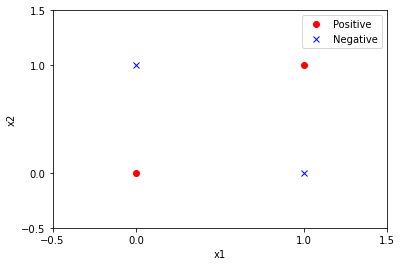

In [2]:
# 获取正类别（y=1）的数据
positive = data.loc[data['y'] == 1]
# 获取负类别（y=-1）的数据
negative = data.loc[data['y'] == -1]

# 绘制数据图
# 绘制坐标轴
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks([-0.5, 0, 1, 1.5])
plt.yticks([-0.5, 0, 1, 1.5])
# 添加坐标轴文字
plt.xlabel("x1")
plt.ylabel("x2")
# 绘制正、负样本点
plt.plot(positive['x1'], positive['x2'], "ro")
plt.plot(negative['x1'], negative['x2'], "bx")
# 添加图示
plt.legend(['Positive', 'Negative'])
plt.show()

&emsp;&emsp;从上图可以看出，无法使用一条直线将两类样本分开，所以异或问题是线性不可分的

In [6]:
from sklearn.linear_model import Perceptron
import numpy as np

# 构造异或问题的训练数据集
X_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([-1, 1, 1, -1])

# 使用sklearn的Perceptron类构建感知机模型
perceptron_model = Perceptron()
# 进行模型训练
perceptron_model.fit(X_train, y)

# 打印模型参数
print("感知机模型的参数：w=", perceptron_model.coef_[
      0], "b=", perceptron_model.intercept_[0])

感知机模型的参数：w= [0. 0.] b= 0.0


&emsp;&emsp;上述使用sklearn的Perceptron类构建感知机模型，从模型的参数上观察，感知机模型无法表示异或。

**第3步：使用反证法证明感知机无法表示异或**

&emsp;&emsp;根据书中第35页感知机模型的定义：  
> **定义2.1（感知机）** 假设输入空间（特征空间）是$\mathcal{X} \in R^n$，输出空间是$\mathcal{y}=\{+1,-1\}$。输入$x \in \mathcal{X}$表示实例的特征向量，对应于输入空间（特征空间）的点；输出$y \in \mathcal{Y}$表示实例的类别。由输入空间到输出空间的如下函数：
> $$
f(x)=\text{sign}(w \cdot x + b)
$$
> 称为感知机。其中，$w$和$b$为感知机模型参数，$w \in R^n$叫做权值或权值向量，$b \in R$叫做偏置，$w \cdot x$表示$w$和$x$的内积。sign是符号函数，即
> $$
\text{sign}(x)=\left \{ \begin{array}{ll}
+1, \quad x \geqslant 0 \\
-1, \quad x < 0
\end{array}\right.
$$

&emsp;&emsp;假设感知机模型可以表示异或问题，即满足异或函数(XOR)输入与输出的情况（见**第1步**）。假设$x$向量只有两个维度$x_1$，$x_2$：
1. 根据$x_1=0, x_2=0, f(x)=-1$，则$w \cdot x +b < 0$，可得$b < 0$；
2. 根据$x_1=0, x_2=1, f(x)=1$，则$w_2 + b > 0$，结合$b < 0$，可得$w_2 > -b > 0$；
3. 根据$x_1=1, x_2=0, f(x)=1$，则$w_1 + b > 0$，结合$b < 0$，可得$w_1 > -b > 0$；
4. 根据$x_1=1, x_2=1$，并结合$w_1 + b > 0$、$w_2 > 0$，则$w_1 + w_2 + b > 0$，可得$f(x)=1$，与异或条件中的$f(x)=-1$矛盾。

&emsp;&emsp;所以假设不成立，原命题成立，即感知机模型不能表示异或。

## 习题2.2

&emsp;&emsp;模仿例题 2.1，构建从训练数据求解感知机模型的例子。

**解答：**

**解答思路：**  
&emsp;&emsp;按照书中第38~39页感知机学习算法2.1，编写代码并绘制分离超平面
> 算法2.1（感知机学习算法的原始形式）  
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\}$，其中$x_i \in \mathcal{X} = R^n$，$y_i \in \mathcal{Y} = \{-1, +1\}$，$i=1,2,\ldots,N$；学习率$\eta (0 < \eta \leqslant 1)$；  
输出：$w,b$；感知机模型$f(x)=\text{sign}(w \cdot x + b)$  
（1）选取初值$w_0, b_0$；  
（2）在训练集中选取数据$(x_i,y_i)$；  
（3）如果$y_i(w \cdot x_i + b) \leqslant 0$，
> $$
\begin{array}{ll}
w \leftarrow w + \eta y_i x_i \\
b \leftarrow b + \eta y_i
\end{array}
$$  
>（4）如果转至（2），直至训练集中没有误分类点。  

**解题步骤：**

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib tk


class Perceptron:
    def __init__(self, X, Y, lr=0.001, plot=True):
        """
        初始化感知机
        :param X: 特征向量
        :param Y: 类别
        :param lr: 学习率
        :param plot: 是否绘制图形
        """
        self.X = X
        self.Y = Y
        self.lr = lr
        self.plot = plot

    def fit(self):
        # （1）初始化weight, b
        weight = np.zeros(self.X.shape[1])
        b = 0
        # 训练次数
        train_counts = 0
        # 分类错误标识
        mistake_flag = True
        if self.plot:
            model_plot = self._ModelPlot(self.X, self.Y)
            model_plot.open_in()
        while mistake_flag is True:
            # 开始前，将mistake_flag设置为False，用于判断本次循环是否有分类错误
            mistake_flag = False
            # （2）从训练集中选取x,y
            for index in range(self.X.shape[0]):
                if self.plot:
                    model_plot.plot(weight, b, train_counts)
                # 损失函数
                loss = self.Y[index] * (weight @ self.X[index] + b)
                # （3）如果损失函数小于0，则该点是误分类点
                if loss <= 0:
                    # 更新weight, b
                    weight += self.lr * self.Y[index] * self.X[index]
                    b += self.lr * self.Y[index]
                    # 训练次数加1
                    train_counts += 1
                    print("Epoch {}, weight = {}, b = {}, formula: {}".format(
                        train_counts, weight, b, model_plot.formula(weight, b)))
                    # 本次循环有误分类点（即分类错误），置为True
                    mistake_flag = True
                    break
        if self.plot:
            model_plot.close()
        # （4）直至训练集中没有误分类点
        return weight, b

    class _ModelPlot:
        def __init__(self, X, Y):
            self.X = X
            self.Y = Y

        def open_in(self):
            # 打开交互模式，用于展示动态交互图
            plt.ion()

        def close(self):
            # 关闭交互模式，并显示最终的图形
            plt.ioff()
            plt.show()

        def plot(self, weight, b, epoch):
            plt.cla()
            # x轴表示x1
            plt.xlim(0, np.max(self.X.T[0]) + 1)
            # y轴表示x2
            plt.ylim(0, np.max(self.X.T[1]) + 1)
            # 画出散点图，并添加图示
            scatter = plt.scatter(self.X.T[0], self.X.T[1], c=self.Y)
            plt.legend(*scatter.legend_elements())
            if True in list(weight == 0):
                plt.plot(0, 0)
            else:
                x1 = -b / weight[0]
                x2 = -b / weight[1]
                # 画出分离超平面
                plt.plot([x1, 0], [0, x2])
                # 绘制公式
                text = self.formula(weight, b)
                plt.text(0.3, x2 - 0.1, text)
            plt.title('Epoch %d' % epoch)
            plt.pause(0.01)

        def formula(self, weight, b):
            text = 'x1 ' if weight[0] == 1 else '%d*x1 ' % weight[0]
            text += '+ x2 ' if weight[1] == 1 else (
                '+ %d*x2 ' % weight[1] if weight[1] > 0 else '- %d*x2 ' % -weight[1])
            text += '= 0' if b == 0 else ('+ %d = 0' %
                                          b if b > 0 else '- %d = 0' % -b)
            return text

Epoch 1, weight = [3. 3.], b = 1, formula: 3*x1 + 3*x2 + 1 = 0
Epoch 2, weight = [2. 2.], b = 0, formula: 2*x1 + 2*x2 = 0
Epoch 3, weight = [1. 1.], b = -1, formula: x1 + x2 - 1 = 0
Epoch 4, weight = [0. 0.], b = -2, formula: 0*x1 - 0*x2 - 2 = 0
Epoch 5, weight = [3. 3.], b = -1, formula: 3*x1 + 3*x2 - 1 = 0
Epoch 6, weight = [2. 2.], b = -2, formula: 2*x1 + 2*x2 - 2 = 0
Epoch 7, weight = [1. 1.], b = -3, formula: x1 + x2 - 3 = 0


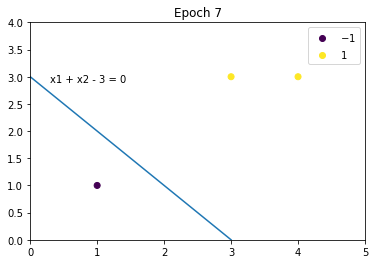

In [5]:
X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])
model = Perceptron(X, Y, lr=1)
weight, b = model.fit()

## 习题2.3
&emsp;&emsp;证明以下定理：样本集线性可分的充分必要条件是正实例点所构成的凸壳与负实例点所构成的凸壳互不相交。

**解答：**

**解答思路：**
1. 写出凸壳和线性可分的定义
2. 证明充分性：线性可分$\Rightarrow$凸壳不相交  
3. 证明必要性：凸壳不相交$\Rightarrow$线性可分  

**第1步：凸壳与线性可分的定义**  
1. 根据书中第47页脚注1的凸壳定义如下：  
> 设集合$S \subset R^n$，是由$R^n$中的$k$个点所组成的集合，即$S=\{x_1,x_2,\cdots, x_k\}$。定义$S$的凸壳$\text{conv}(S)$为：
> $$
\text{conv}(S) = \left\{ x = \sum_{i=1}^k \lambda_i x_i \Big| \sum_{i=1}^k \lambda_i=1,\lambda_i \geqslant 0, i=1,2,\cdots, k \right\}
$$

2. 根据书中第36页的线性可分定义如下： 
> 给定一个数据集
> $$
T=\{(x_1,y_1), (x_2,y_2), \cdots, (x_n,y_n)\}
$$
> 其中$x_i \in \mathcal{X}=R_n, y_i \in \mathcal{Y} = \{+1, -1\}, i=1,2,\cdots, n$，如果存在某个超平面$S$
> $$
w \cdot x + b = 0
$$
> 能够将数据集的正实例点和负实例点完全正确划分到超平面的两侧，即对所有$y_i=+1$的实例$i$，有$w \cdot x_i + b > 0$，对$y_i = -1$的实例$i$，有$w \cdot x_i + b < 0$，则称数据集$T$为线性可分数据集，否则称数据集$T$线性不可分。

**第2步：证明充分性：线性可分$\Rightarrow$凸壳不相交**  

证明思路：
1. 条件假设：将数据集分为正实例的凸壳（正凸壳）、负实例的凸壳（负凸壳），并列出相关性质；
2. 采用反证法，即凸壳相交，假设一个点同时存在于正负两个凸壳中；
3. 按照步骤1得到的性质，不能同时满足正负实例点的条件，得出矛盾。

证明步骤：
1. 条件假设：  
&emsp;&emsp;假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$。  
&emsp;&emsp;若数据集$T$是线性可分的，根据线性可分的定义，则存在一个超平面
$$
w \cdot x + b = 0
$$
能够将$S_+$和$S_-$完全分离。  
&emsp;&emsp;对于所有的正例点$x_i$，有
$$
w \cdot x_i + b = \varepsilon_i > 0, \quad i = 1,2,\cdots,|S_+|
$$
&emsp;&emsp;根据凸壳的定义，对于$\text{conv}(S_+)$中的元素$s^+$，有
$$
\begin{aligned}
w \cdot s^+ &= w \cdot \sum_{i=1}^k \lambda_i x_i \\
&= \sum_{i=1}^k \lambda_i(\varepsilon_i - b) \\
&= \sum_{i=1}^k \lambda_i \varepsilon_i - \sum_{i=1}^k \lambda_i b \quad (\because \sum_{i=1}^k \lambda_i = 1) \\
& = \sum_{i=1}^k \lambda_i \varepsilon_i - b 
\end{aligned}
$$
&emsp;&emsp;因此$\displaystyle w \cdot s^+ + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$。  
&emsp;&emsp;同理对于$S_-$中的元素$s^-$，有$\displaystyle w \cdot s^- + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$ 

2. 反证法：  
&emsp;&emsp;假设$\text{conv}(S_+)$和$\text{conv}(S_-)$相交，即存在某个元素$s$，同时满足$s \in \text{conv}(S_+)$和$s \in \text{conv}(S_-)$。 

3. 根据步骤1得到的性质：  
&emsp;&emsp;有$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$且$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$，可推出矛盾。  
&emsp;&emsp;因此，$\text{conv}(S_+)$ 和$\text{conv}(S_-)$必不相交，充分性得证。

**第3步：证明必要性：凸壳不相交$\Rightarrow$线性可分**  

证明思路：
1. 条件假设：将数据集分为正实例的凸壳（正凸壳）、负实例的凸壳（负凸壳），并定义两个凸壳的距离：分别处于两个凸壳集合中的点的距离最小值，即为凸壳边界上的最近两点之间的距离
2. 计算两点的法线方程参数$w$和$b$
3. 根据线性可分正负实例点的条件，可得到该法线是分离超平面，即满足线性可分条件

证明步骤：
1. 条件假设：  
&emsp;&emsp;假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$，且$\text{conv}(S_+)$与$\text{conv}(S_-)$不相交。   
&emsp;&emsp;定义两个点$x_1,x_2$的距离为
$$
\text{dist}(x_1,x_2) = \|x_1 - x_2\|_2 = \sqrt{(x_1 - x_2)^2}
$$  
&emsp;&emsp;定义$\text{conv}(S_+)$、$\text{conv}(S_-)$的距离，分别处于两个凸壳集合中的点的距离最小值，即为分别处于两个凸壳边界上的最近两点之间的距离：
$$
\text{dist}(\text{conv}(S_+),\text{conv}(S_-)) = \min \|s_+ - s_-\|_2 = \text{dist}(s_+, s_-), \quad s_+ \in \text{conv}(S_+), s_- \in \text{conv}(S_-)
$$  

2. 计算两点的法线方程参数$w$和$b$  
&emsp;&emsp;假设$x_+ \in \text{conv}(S_+), x_- \in \text{conv}(S_-)$，根据步骤1，可得：$$
\text{dist}(x_+, x_-) = \text{dist}(\text{conv}(S_+),\text{conv}(S_-))
$$
&emsp;&emsp;该两点$(x_+, x_-)$之间存在一条法线，法线方程$w \cdot x + b = 0$的参数如下：
$$
\left \{ \begin{array}{ll} 
w = x_+ - x_- \\ 
\displaystyle b = -\frac{1}{2}(x_+^2 -  x_-^2)
\end{array}\right .
$$

3. 根据正负实例点的条件证明：  
&emsp;&emsp;对于任意正实例点$x \neq x_+$，都有$\text{dist}(x,x_-) \geqslant \text{dist}(x , x_+)$，即点$x$与正凸壳边界上的正例点距离大于与负凸壳边界上的负例点距离，有
$$
\begin{aligned}
w\cdot x +b & = (x_+-x_-)\cdot x -\frac{1}{2}(x_+^2 -  x_-^2) \\
& = \frac{1}{2} [2x(x_+ - x_-) - (x_+^2 -  x_-^2)] \\
&= \frac{1}{2} (x_-^2 - 2 x x_- - x_+^2 + 2 x x_+) \\
&= \frac{1}{2} [(x_-^2 - 2 x x_- + x^2) - (x_+^2 - 2 x x_+ + x^2)] \\
&= \frac{1}{2}(\|x_- - x\|_2^2-\|x_+ - x\|_2^2)\\
&= \frac{1}{2}[\text{dist}(x,x_-)^2-\text{dist}(x,x_+)^2]
\end{aligned}
$$
&emsp;&emsp;根据$\text{dist}(x,x_-) \geqslant \text{dist}(x , x_+)$，则
$$
w\cdot x +b = \frac{1}{2}[\text{dist}(x,x_-)^2-\text{dist}(x,x_+)^2] \geqslant 0
$$
&emsp;&emsp;综上所述，对于任意正实例点$x \neq x_+$，都有$w\cdot x +b \geqslant 0$。  
&emsp;&emsp;同理，对于任意负实例点$x \neq x_-$，都有$\text{dist}(x,x_+) \geqslant \text{dist}(x , x_-)$，可得$w\cdot x +b \leqslant 0$。  

  &emsp;&emsp;根据线性可分条件，对所有正实例$x_i$，有$w \cdot x_i + b > 0$，对所有负实例$x_i$，有$w \cdot x_i + b < 0$，则称数据集$T$为线性可分数据集，该法线为分离超平面，必要性得证。